## App Ratings Case Study – Tier 3

### 🎯 Objective:
I'm developing a custom operating system and need to choose **either the Apple App Store or the Google Play Store** to integrate. I want to select the store that offers **higher quality apps**, using **user ratings** as a quality metric.

### 🧪 Approach:
To make a data-driven decision, I plan to:
- Analyze app rating data from both platforms
- Perform exploratory data analysis (EDA)
- Conduct a statistical hypothesis test to determine if there's a significant difference in average ratings

If the difference turns out to be statistically significant, I’ll choose the better-rated store. If not, I’ll flip a coin to decide.

This project is based on the Tier 3 version of the case study, and all the code and analysis have been completed independently.


In [2]:
# Load necessary libraries
import pandas as pd

apple_df = pd.read_csv("AppleStore.csv")
google_df = pd.read_csv("googleplaystore.csv")

apple_clean = apple_df[['track_name', 'user_rating']].copy()
google_clean = google_df[['App', 'Rating']].copy()
google_clean.rename(columns={'App': 'track_name', 'Rating': 'user_rating'}, inplace=True)

apple_clean['platform'] = 'Apple'
google_clean['platform'] = 'Google'

apple_clean.dropna(subset=['user_rating'], inplace=True)
google_clean.dropna(subset=['user_rating'], inplace=True)

google_clean = google_clean[google_clean['user_rating'].between(1, 5)]

combined_df = pd.concat([apple_clean, google_clean], ignore_index=True)

combined_df.head()


,track_name,user_rating,platform
0,PAC-MAN Premium,4.0,Apple
1,Evernote - stay organized,4.0,Apple
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",3.5,Apple
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",4.0,Apple
4,Bible,4.5,Apple


## Step 3: Exploratory Data Analysis (EDA)

Before performing any statistical tests, I explored the distribution of user ratings on both platforms. My goal here was to understand the average rating, the spread (standard deviation), and any unusual values or patterns.


           count      mean       std  min  25%  50%  75%  max
platform                                                     
Apple     7197.0  3.526956  1.517948  0.0  3.5  4.0  4.5  5.0
Google    9366.0  4.191757  0.515219  1.0  4.0  4.3  4.5  5.0


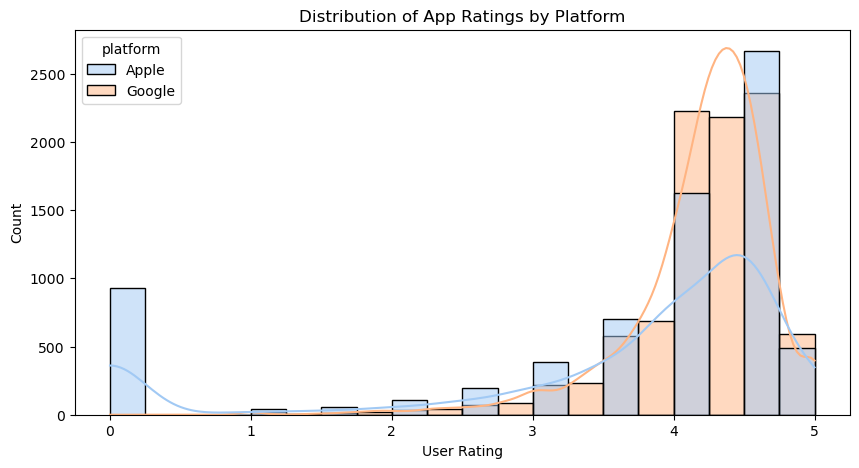

/var/folders/8v/l804p1v56rg0kxpqswf28qtw0000gn/T/ipykernel_42803/3966891762.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='platform', y='user_rating', data=combined_df, palette='pastel')


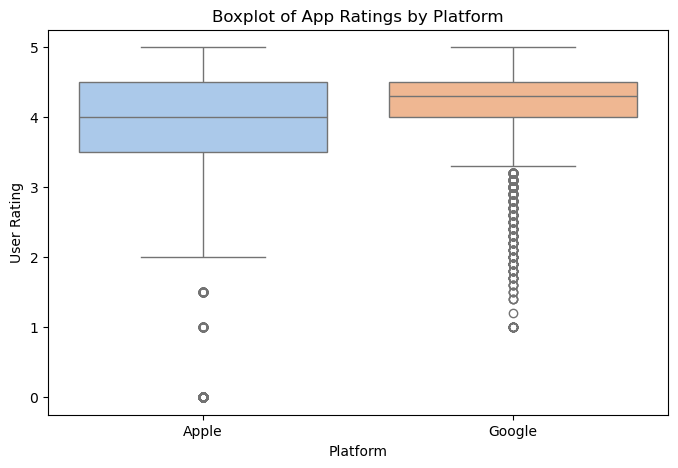

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics by platform
summary_stats = combined_df.groupby('platform')['user_rating'].describe()
print(summary_stats)

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=combined_df, x='user_rating', hue='platform', kde=True, bins=20, palette='pastel')
plt.title('Distribution of App Ratings by Platform')
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='platform', y='user_rating', data=combined_df, palette='pastel')
plt.title('Boxplot of App Ratings by Platform')
plt.xlabel('Platform')
plt.ylabel('User Rating')
plt.show()

Here’s what I observed from the summary statistics and visualizations:

- **Average Rating**:
  - Google Play apps have a higher average rating (**~4.19**) compared to Apple Store apps (**~3.53**).
  
- **Spread of Ratings**:
  - Google ratings are more tightly clustered around 4–5, with **lower standard deviation (~0.51)**.
  - Apple ratings are more spread out and have **greater variation (~1.52)**.

- **Outliers**:
  - Apple has a few apps with very low ratings (even 0), which pulls the average down.
  - Google has many ratings clustered at 4 and above, with fewer extreme lows.

- **Boxplot Insight**:
  - Google’s boxplot is more compact, showing **consistently high ratings**.
  - Apple’s ratings show **wider variability** and several low outliers.

These results suggest Google Play may have slightly better-rated apps, but I’ll confirm this with a statistical test next.


## Step 4: Statistical Testing

To test whether there is a statistically significant difference in app ratings between the Apple App Store and Google Play Store, I used a **two-sample independent t-test**.

### 🧪 Hypotheses:

- **Null Hypothesis (H₀):** The average rating is the same for Apple and Google.
- **Alternative Hypothesis (H₁):** The average rating is different for Apple and Google.

This is a two-tailed test, because I'm testing for *any* difference — not just whether one is greater than the other.

In [6]:
from scipy.stats import ttest_ind

# Separate ratings by platform
apple_ratings = combined_df[combined_df['platform'] == 'Apple']['user_rating']
google_ratings = combined_df[combined_df['platform'] == 'Google']['user_rating']

# Run an independent two-sample t-test
t_stat, p_value = ttest_ind(apple_ratings, google_ratings, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -35.61163098447999
P-value: 5.630696786884524e-259


### 🧪 Test Results & Interpretation

- **T-statistic:** -35.61  
- **P-value:** ~0 (5.63e-259)

Because the p-value is much smaller than 0.05, I can **reject the null hypothesis**. This means there is a **statistically significant difference** in average app ratings between the Apple App Store and Google Play Store.

Since Google has the higher average rating, this result suggests that apps on the **Google Play Store tend to be rated more highly** than those on the Apple Store.

## Step 5: Final Recommendation

Based on my analysis, I found a statistically significant difference in app ratings between the Apple App Store and Google Play Store.

### 📌 Summary of Findings:
- Google Play apps have a **higher average rating** (~4.19) than Apple Store apps (~3.53)
- Ratings on Google are also **more consistent**, with fewer low-rated outliers
- The two-sample t-test produced a **very small p-value (~0)**, which means the difference in ratings is **not due to random chance**

### ✅ Recommendation:
Since Google Play apps are rated significantly higher on average, I recommend integrating the **Google Play Store** into the operating system.

This decision is backed by strong statistical evidence showing better app quality based on user ratings.